In [423]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy.stats import multivariate_normal
from collections import OrderedDict

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (12,6)
legend_fontsize = 16

# 1.

## Считываем данные

In [424]:
data = pd.read_csv('owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293542 entries, 0 to 293541
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    293542 non-null  object 
 1   continent                                   279595 non-null  object 
 2   location                                    293542 non-null  object 
 3   date                                        293542 non-null  object 
 4   total_cases                                 257985 non-null  float64
 5   new_cases                                   285216 non-null  float64
 6   new_cases_smoothed                          283952 non-null  float64
 7   total_deaths                                237667 non-null  float64
 8   new_deaths                                  285288 non-null  float64
 9   new_deaths_smoothed                         284058 non-null  float64
 

## Оставляем данные по России с 03.03.2020

In [426]:
data = data[data['location'] == 'Russia']
data = data[data['date'] >= '2020-03-03']
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
214873,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,0.0,0.000,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
214874,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,0.0,0.000,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
214875,RUS,Europe,Russia,2020-03-05,3.0,0.0,0.143,NaN,0.0,0.000,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
214876,RUS,Europe,Russia,2020-03-06,4.0,1.0,0.286,NaN,0.0,0.000,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
214877,RUS,Europe,Russia,2020-03-07,4.0,0.0,0.286,NaN,0.0,0.000,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215971,RUS,Europe,Russia,2023-03-06,22353291.0,11163.0,12939.143,396336.0,38.0,38.714,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
215972,RUS,Europe,Russia,2023-03-07,22363740.0,10449.0,13038.571,396378.0,42.0,39.714,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
215973,RUS,Europe,Russia,2023-03-08,NaN,NaN,NaN,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
215974,RUS,Europe,Russia,2023-03-09,NaN,NaN,NaN,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN


## Оставим только таргеты и дату, и отсортируем по дате

In [427]:
data = data[['date', 'total_cases', 'new_cases']]
data = data.sort_values(by = ['date'], ignore_index = True)
data

,date,total_cases,new_cases
0,2020-03-03,3.0,1.0
1,2020-03-04,3.0,0.0
2,2020-03-05,3.0,0.0
3,2020-03-06,4.0,1.0
4,2020-03-07,4.0,0.0
...,...,...,...
1098,2023-03-06,22353291.0,11163.0
1099,2023-03-07,22363740.0,10449.0
1100,2023-03-08,NaN,NaN
1101,2023-03-09,NaN,NaN


In [428]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1103 non-null   object 
 1   total_cases  1100 non-null   float64
 2   new_cases    1100 non-null   float64
dtypes: float64(2), object(1)
memory usage: 26.0+ KB


## Заменим нули на единицы в new_cases

In [429]:
data['new_cases'].value_counts()

0.0         11
1.0          2
180071.0     2
9284.0       2
6088.0       2
            ..
9632.0       1
9299.0       1
8457.0       1
8861.0       1
10449.0      1
Name: new_cases, Length: 1070, dtype: int64

In [430]:
data['new_cases'] = data['new_cases'].replace(0, 1)

In [431]:
data['new_cases'].value_counts()

1.0         13
180071.0     2
6088.0       2
9284.0       2
6611.0       2
            ..
9299.0       1
8457.0       1
8861.0       1
9221.0       1
10449.0      1
Name: new_cases, Length: 1069, dtype: int64

## Разделим на train и test

In [432]:
train_end = '2020-04-22'
test_end = '2020-06-11'

In [433]:
data_train = data[data['date'] < train_end]
data_test = data[((data['date'] >= train_end) & (data['date'] < test_end))]
data_all = data[data['date'] < test_end]

In [434]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         50 non-null     object 
 1   total_cases  50 non-null     float64
 2   new_cases    50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [435]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 50 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         50 non-null     object 
 1   total_cases  50 non-null     float64
 2   new_cases    50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


# 2.

## Построим графики целевых переменных

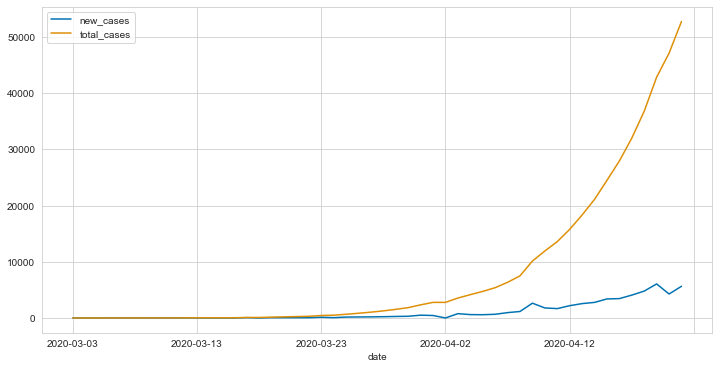

In [436]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
data_train.plot('date', 'new_cases', ax = ax)
data_train.plot('date', 'total_cases', ax = ax)
plt.show()

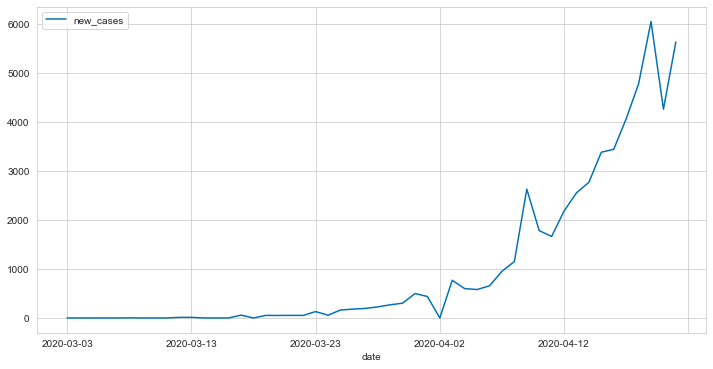

In [437]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
data_train.plot('date', 'new_cases', ax = ax)
plt.show()

По графикам видно, что на трейновой части рост общего числа заболевших выглядит как экспоненциальный. Аналогично выглядит и рост числа новых случаев. Попробуем построить именно такую модель.

## a) Экспоненциальная модель

Для обучения модели $y$ ~ $\exp (a*x + b)$ нужно обучить линейную модель с таргетом, равным логарифму от исходного таргета

In [438]:
exp_total_model = linear_model.LinearRegression(fit_intercept=True).fit(
    data_train.index.array.reshape(-1, 1),
    np.log(data_train['total_cases'])
)

data_train['exp_model_total_cases'] = np.exp(exp_total_model.predict(data_train.index.array.reshape(-1, 1)))


/var/folders/cb/27mzjfxs377c11b1s98p_6y40000gn/T/ipykernel_3872/2363320982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['exp_model_total_cases'] = np.exp(exp_total_model.predict(data_train.index.array.reshape(-1, 1)))


Построим графики реальных и предсказанных значений

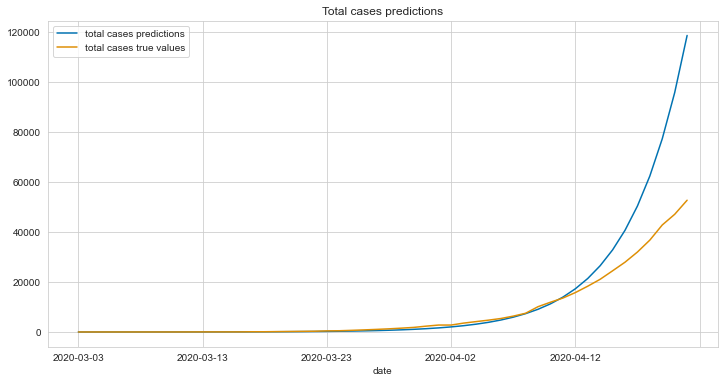

In [439]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
data_train.plot('date', 'exp_model_total_cases', ax = ax, label = 'total cases predictions')
data_train.plot('date', 'total_cases', ax = ax, label = 'total cases true values')
plt.title('Total cases predictions')
plt.show()

Можно видеть, что модель не описывает данные должным образом. Начиная примерно с 13го апреля 2020 года предсказания total cases сильно завышаются относительно реальных данных.

## b) Найдем апостериорное распределение параметров этой модели для достаточно широкого априорного распределения

Мы знаем, что если возьмем гауссовское распределение в качестве априорного, то апостериорное также будет гауссовским. Однако для получения апостериорного нам потребуется знать дисперсию шума. Оценим ее как MLE, то есть $\sigma^2$ = $\frac{RSS}{n}$

### Выберем априорное распределение

In [440]:
exp_total_model.coef_

array([0.21410637])

In [441]:
exp_total_model.intercept_

1.1934192756385702

In [442]:
mu_pr, sigma_pr = np.array([0, 0]), np.array([[6, 2], [2, 1]])

### Оценим дисперсию шума

In [443]:
# это именно дисперсия, а не корень из нее
sigma_noise = np.linalg.norm(
    np.log(data_train['total_cases']) - np.log(data_train['exp_model_total_cases'])
) ** 2 / (data_train.shape[0])
sigma_noise

0.20240093194007638

### Вычислим параметры апостериорного распределения

In [444]:
X_train = np.hstack((np.ones((data_train.shape[0], 1)), data_train.index.array.reshape(-1, 1)))
w = np.array([exp_total_model.intercept_, exp_total_model.coef_[0]])
y_train = np.log(data_train['total_cases'])

sigma_post = np.linalg.inv(
    np.linalg.inv(sigma_pr) + 1 / sigma_noise * np.matmul(X_train.T, X_train)
)
mu_post = np.matmul(
    sigma_post, 
    np.matmul(np.linalg.inv(sigma_pr), mu_pr) +  1 / sigma_noise * np.matmul(X_train.T, y_train)
)

In [445]:
mu_post

array([1.18719901, 0.21429758])

In [446]:
sigma_post

array([[ 1.55779165e-02, -4.71972991e-04],
       [-4.71972991e-04,  1.93063845e-05]])

Заметим, что вектор средних практически не отличается от полученных нами значений коэффициентов модели.

## c) Посэмплируем много разных экспонент, построим графики, найдем предсказательные распределения

In [447]:
def myplot_sample_lines(data, mu, sigma, n=20, label = None):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    data.plot('date', 'total_cases', ax = ax, label = 'total cases true values')

    my_w = np.random.multivariate_normal(mu, sigma, n)

    for w in my_w:
        plt.plot(
            data['date'], 
            np.exp(w[0] + w[1]*data.index.array), 
            'k-', 
            lw=.4,
            label = 'samples'
        )

    plt.plot(
        data['date'], 
        np.exp(mu[0] + mu[1]*data.index.array),  
        lw=3,
        label = 'MAP hypothesis'
    )    

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    if label != None:
        plt.title(label)
    plt.show()
    return my_w

Графики на трейновой части данных

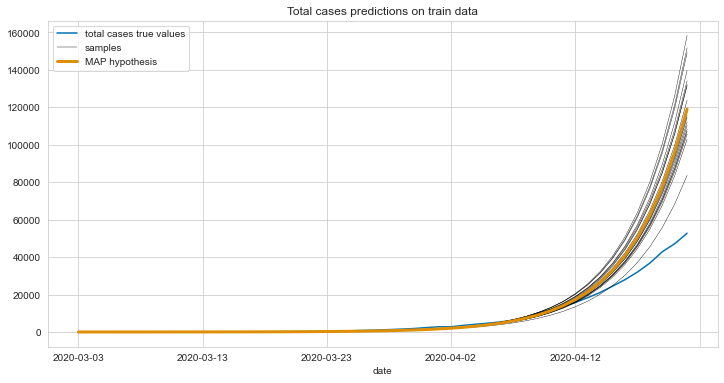

In [448]:
_ = myplot_sample_lines(
    data_train, 
    mu_post, 
    sigma_post, 
    n=20, 
    label = 'Total cases predictions on train data'
)


Графики на объединении трейновой и тестовой частей данных

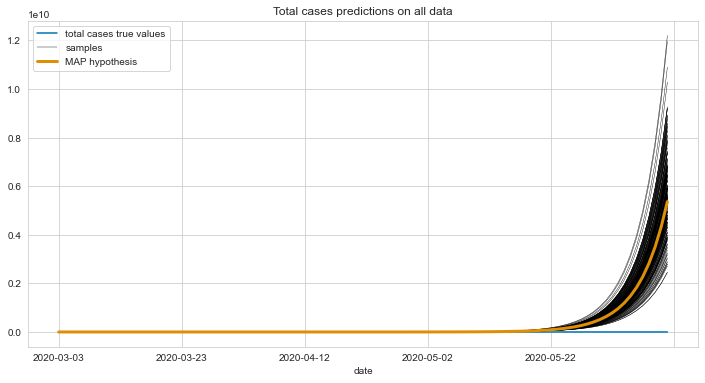

In [449]:
sample_weights = myplot_sample_lines(
    data_all, 
    mu_post, 
    sigma_post, 
    n=200, 
    label = 'Total cases predictions on all data'
)

Можно видеть, что относительно наших предсказаний реальные значения таргета визуально даже не поднимаются выше нуля. Построим предсказательные распределения на моменты 1 мая, 1 июня и 1 сентября, а также значения 10го и 90го процентиля.

In [450]:
def plot_sample_dist(weights_list, x, title = None, get_percentiles = None):
    fig = plt.figure(figsize=figsize)
    y = []
    for weights in weights_list:
        y.append(weights[0] + x * weights[1])
    y = np.exp(np.array(y))
    sns.histplot(y, kde = True)
    
    if title != None:
        plt.title(title)
    
    if get_percentiles != None:
        return np.percentile(y, get_percentiles)
    return None

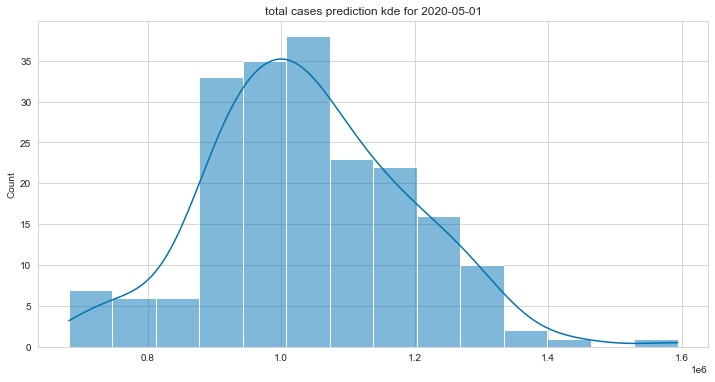

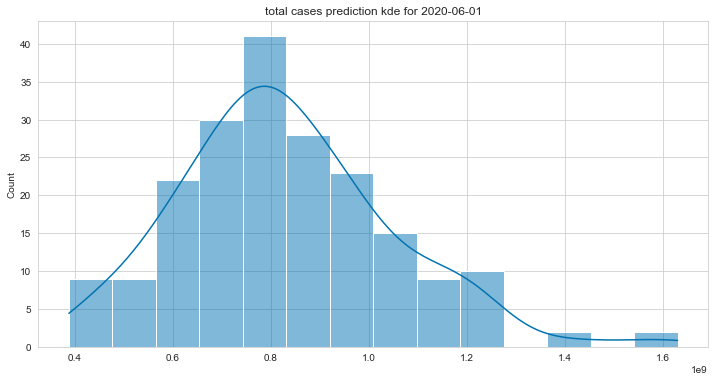

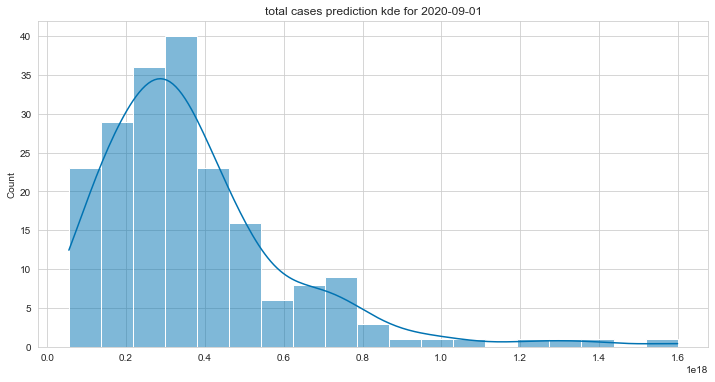

In [451]:
dates = ['2020-05-01', '2020-06-01', '2020-09-01']
x_list = [data['date'][data['date'] == date].index[0] for date in dates]
percentels_to_compute = [10, 90]
percentiles = []

for i in range(len(dates)):
    cur_perc = plot_sample_dist(
        sample_weights, 
        x_list[i], 
        title = f'total cases prediction kde for {dates[i]}',
        get_percentiles = percentels_to_compute
    )
    plt.show()
    percentiles.append(cur_perc)
    

Видно, что распределение из похожего на нормальное переходит в похожее на экспоненциальное. Это происходит из-за большого разброса при применении экспоненты при вычислении значения таргета.

Выведем теперь процентили для каждой даты

In [452]:
for i, perc_vals in enumerate(percentiles):
    print(f'For {dates[i]:}')
    for j in range(len(percentels_to_compute)):
        print(f'\t {percentels_to_compute[j]}-th percentile: {perc_vals[j]}')

For 2020-05-01
	 10-th percentile: 880122.9444850014
	 90-th percentile: 1249933.6201506609
For 2020-06-01
	 10-th percentile: 579847398.5331758
	 90-th percentile: 1126631757.2484086
For 2020-09-01
	 10-th percentile: 1.3008036679557013e+17
	 90-th percentile: 7.003452276485545e+17


Очевидно, что результаты крайне абсурдны, и что наша модель совершенно не соответствует действительности.

# 3.

## a) корректировка модели и ее обучение

Разумно предположить, что после экспоненциального роста, число заболевших выходит на плато (так как число людей, которых можно заразить, уменьшается). Для того, чтобы это учесть рассмотрим следующую модель:
$$y(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} \exp (at^2 + bt + c) \,dt$$
Но как ее обучать? Такую функцию нельзя выразить в элементарных, но зато легко посчитать производную:
$$y'(x) = \frac{1}{\sqrt{2\pi}} \exp(ax^2 + bx + c) $$
А данная функция показывает прирост числа заболевших, то есть по сути new_cases. Поэтому можно обучить модель $y'(x) = \frac{1}{\sqrt{2\pi}} \exp(ax^2 + bx + c) $ на таргет new_cases, а предсказания total_cases получить как сумму предсказаний для new_cases до текущей даты.

Замечание: на самом деле можно обучать без константы $\frac{1}{\sqrt{2\pi}}$, так как ее можно "убрать" в константу $c$

## b) Обучим параметры и найдем апостериорное распределение параметров

### Обучим модель

In [453]:
X_train_new = np.hstack(
    (
        np.ones((data_train.shape[0], 1)), 
        data_train.index.array.reshape(-1, 1),
        data_train.index.array.reshape(-1, 1) ** 2
    )
)

exp_model_new = linear_model.LinearRegression(fit_intercept=False).fit(
    X_train_new,
    np.log(data_train['new_cases'])
)

In [454]:
exp_model_new.coef_

array([-0.87255779,  0.25828088, -0.00119026])

### Найдем апостериорное распределение параметров

In [455]:
mu_pr_new, sigma_pr_new = np.array([0, 0, 0]), np.array([[10, 0, 0], [0, 5, 0], [0, 0, 2]])

### Оценим дисперсию шума

In [456]:
# это именно дисперсия, а не корень из нее
sigma_noise_new = np.linalg.norm(
    np.log(data_train['new_cases']) - exp_model_new.predict(X_train_new)
) ** 2 / (data_train.shape[0])
sigma_noise_new

1.4309500093246093

### Вычислим параметры апостериорного распределения

In [457]:
w_new = exp_model_new.coef_
y_train_new = np.log(data_train['new_cases'])

sigma_post_new = np.linalg.inv(
    np.linalg.inv(sigma_pr_new) + 1 / sigma_noise_new * np.matmul(X_train_new.T, X_train_new)
)
mu_post_new = np.matmul(
    sigma_post_new, 
    np.matmul(np.linalg.inv(sigma_pr_new), mu_pr_new) +  1 / sigma_noise_new * np.matmul(X_train_new.T, y_train_new)
)

In [458]:
mu_post_new

array([-0.85130837,  0.25653497, -0.00116062])

In [459]:
sigma_post_new

array([[ 2.32412765e-01, -1.87755062e-02,  3.16068022e-04],
       [-1.87755062e-02,  2.08336991e-03, -3.98433184e-05],
       [ 3.16068022e-04, -3.98433184e-05,  8.15323097e-07]])

## c) Посэмплируем много разных сигмоид, построим графики, найдем предсказательные распределения

In [460]:
def myplot_sample_sigmoid_lines(data, mu, sigma, n=20, label = None):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    data.plot('date', 'total_cases', ax = ax, label = 'total cases true values', lw = 10)

    my_w = np.random.multivariate_normal(mu, sigma, n)

    for w in my_w:
        
        new_cases_preds = np.exp(w[0] + w[1] * data.index.array + w[2] * data.index.array ** 2)
        
        plt.plot(
            data['date'], 
            [new_cases_preds[:(i + 1)].sum() for i in range(len(new_cases_preds))],
            'k-', 
            lw=.4,
            label = 'samples'
        )
        
    new_cases_preds_mean = np.exp(mu[0] + mu[1] * data.index.array + mu[2] * data.index.array ** 2)
    map_hyp_preds = np.array([new_cases_preds_mean[:(i + 1)].sum() for i in range(len(new_cases_preds_mean))])
    plt.plot(
        data['date'], 
        map_hyp_preds,
        lw=3,
        label = 'MAP hypothesis'
    )    
    ax.set_ylim((0, map_hyp_preds.max()))
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    if label != None:
        plt.title(label)
    plt.show()
    return my_w

Графики на трейновой части данных

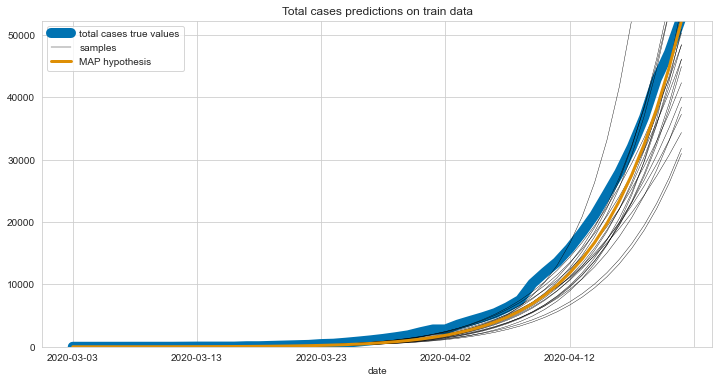

In [461]:
_ = myplot_sample_sigmoid_lines(
    data_train, 
    mu_post_new, 
    sigma_post_new, 
    n=20, 
    label = 'Total cases predictions on train data'
)


Графики на объединении трейновой и тестовой частей данных

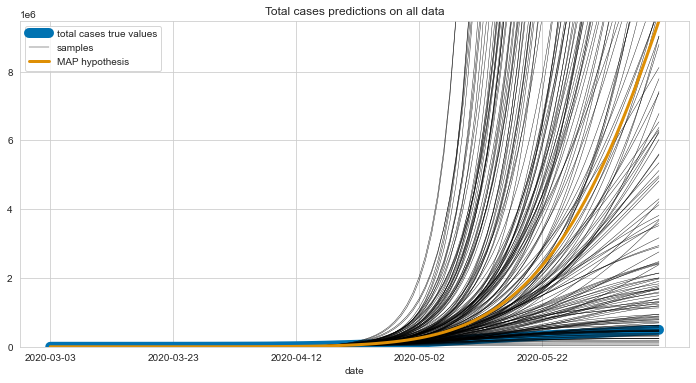

In [462]:
sample_weights_new = myplot_sample_sigmoid_lines(
    data_all, 
    mu_post_new, 
    sigma_post_new, 
    n=200, 
    label = 'Total cases predictions on all data'
)

Можно видеть, что теперь на трейне получаются довольно точные предсказания. На тесте ситуация хоть и стала в разы лучше, но все равно оставляет желать лучшего. Отметим, что часть семплированных линий теперь выходит на плато раньше, чем в это было в реальности. Построим такой же график для дат до сентября месяца.

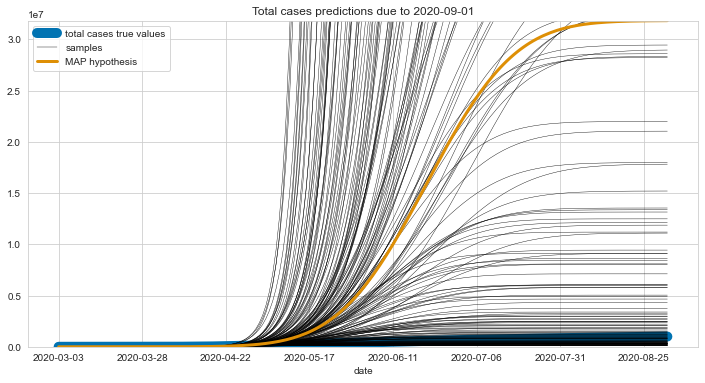

In [463]:
sample_weights_new = myplot_sample_sigmoid_lines(
    data[data['date'] <= '2020-09-01'], 
    mu_post_new, 
    sigma_post_new, 
    n=200, 
    label = 'Total cases predictions due to 2020-09-01'
)

Видно, что разброс возможных предсказаний просто огромен. Предскажем макимальное число случае заражения в России.

Maximum total_cases value predicted: 31836227


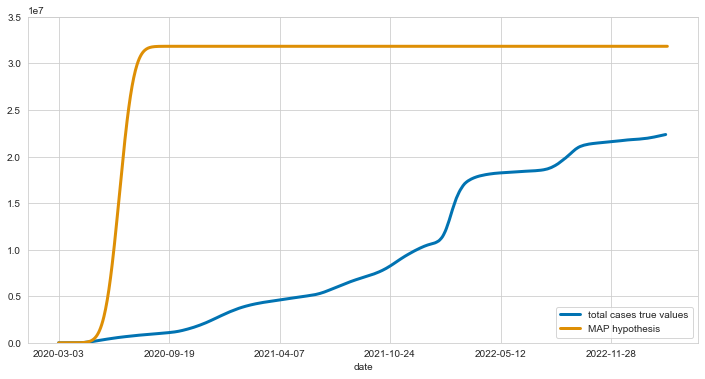

In [464]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
data.plot('date', 'total_cases', ax = ax, label = 'total cases true values', lw = 3)

new_cases_preds_mean = np.exp(mu_post_new[0] + mu_post_new[1] * data.index.array + mu_post_new[2] * data.index.array ** 2)
map_hyp_preds = np.array([new_cases_preds_mean[:(i + 1)].sum() for i in range(len(new_cases_preds_mean))])
plt.plot(
    data['date'], 
    map_hyp_preds,
    lw=3,
    label = 'MAP hypothesis'
)    
print(f'Maximum total_cases value predicted: {int(map_hyp_preds[-1])}')

ax.set_ylim((0, map_hyp_preds.max() * 1.1))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

Построим графики процентилей и сравним их с реальными значениями

In [465]:
def myplot_sample_sigmoid_lines_perc(data, mu, sigma, percentels_to_compute, n=20, label = None):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    data.plot('date', 'total_cases', ax = ax, label = 'total cases true values', lw = 10)

    my_w = np.random.multivariate_normal(mu, sigma, n)
    
    all_total_preds = []
    for w in my_w:
        
        new_cases_preds = np.exp(w[0] + w[1] * data.index.array + w[2] * data.index.array ** 2)
        total_cases_preds = [new_cases_preds[:(i + 1)].sum() for i in range(len(new_cases_preds))]
        all_total_preds.append(total_cases_preds)
#         plt.plot(
#             data['date'], 
#             total_cases_preds,
#             'k-', 
#             lw=.4,
#             label = 'samples'
#         )
        
    all_total_preds = np.array(all_total_preds)
    percentile_values = []
    for perc in percentels_to_compute:
        tmp_perc_val = np.percentile(all_total_preds, perc, axis = 0)
        percentile_values.append(tmp_perc_val)
        plt.plot(
            data['date'], 
            tmp_perc_val,
            lw=4,
            label = f'{perc}-th percentile'
        )
    
    new_cases_preds_mean = np.exp(mu[0] + mu[1] * data.index.array + mu[2] * data.index.array ** 2)
    map_hyp_preds = np.array([new_cases_preds_mean[:(i + 1)].sum() for i in range(len(new_cases_preds_mean))])
    plt.plot(
        data['date'], 
        map_hyp_preds,
        lw=10,
        label = 'MAP hypothesis'
    )    
    ax.set_ylim((0, data['total_cases'].max() * 2))
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    if label != None:
        plt.title(label)
    plt.show()
    return my_w, percentile_values


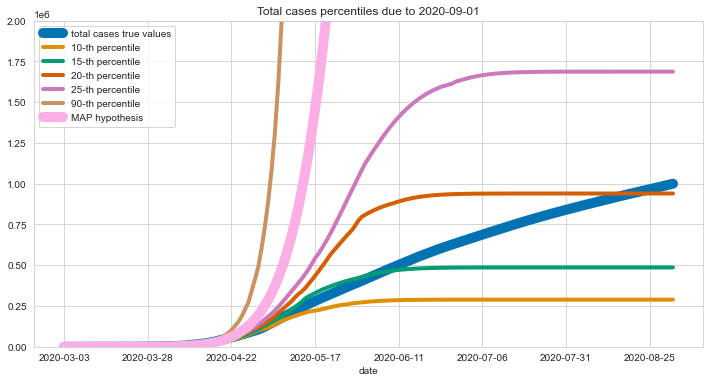

In [466]:
percentels_to_compute = [10, 15, 20, 25, 90]
sample_weights_new, percentile_values = myplot_sample_sigmoid_lines_perc(
    data[data['date'] <= '2020-09-01'], 
    mu_post_new, 
    sigma_post_new, 
    percentels_to_compute,
    n=200, 
    label = 'Total cases percentiles due to 2020-09-01'
)

Посчитаем значения процентилей

In [467]:
dates = ['2020-05-01', '2020-06-01', '2020-09-01']
x_list = [data['date'][data['date'] == date].index[0] for date in dates]

In [468]:
for j in range(len(dates)):
    print(f'For {dates[j]:}')
    print(f'\tReal value of total_cases: {int(data["total_cases"][x_list[j]])}')
    for i in range(len(percentels_to_compute)):
        
        print(f'\t\t {percentels_to_compute[i]}-th percentile: {int(percentile_values[i][x_list[j]])}')

For 2020-05-01
	Real value of total_cases: 114431
		 10-th percentile: 106324
		 15-th percentile: 118823
		 20-th percentile: 130824
		 25-th percentile: 151665
		 90-th percentile: 605408
For 2020-06-01
	Real value of total_cases: 414878
		 10-th percentile: 274609
		 15-th percentile: 434918
		 20-th percentile: 809786
		 25-th percentile: 1125331
		 90-th percentile: 308311772
For 2020-09-01
	Real value of total_cases: 1000048
		 10-th percentile: 289251
		 15-th percentile: 486528
		 20-th percentile: 940059
		 25-th percentile: 1687501
		 90-th percentile: 185114999489160992


# Выводы

- Первая модель абсолютно не подходит для каких-либо адекватных предсказаний
- Модель с сигмоидой справляется с предсказаниями гораздо лучше, но важно отметить, что по мере увеличения даты предсказания, дисперсия увеличивается гораздо сильнее, чем в первой модели (можно предположить, что это происходит из-за бОльшего количества параметров)
- По результатам предсказания модели общее число заражений в России достигнет примерно 32 миллионов человек, что недалеко от реальности (~ 23 млн), но это значение при моделировании было достигнуто гораздо раньше
- Также заметим, что в реальности нет явного выхода на плато, в отличии от нашей модели
- Больше всего реальное положение дел отражает "оптимистичный сценарий" (до 1 сентября настоящие значения total_cases лежит между 10-м и 25-м процентилями)